In [24]:
import random
import pandas as pd
[w1,w2,w3,w4] = [0.526,0.526,0.526,0.526]
vals = []
for i in range(1000):
    x1 = random.randint(1, 50)
    x2 = random.randint(10, 20)
    x3 = random.randint(40, 50)
    x4 = random.randint(60, 70)
    eq = w1*x1+w2*x2+w3*x3+w4*x4
    vals.append([x1,x2,x3,x4,eq])
df = pd.DataFrame(vals,columns=['Brand Preference','Brand Attitude','Purchase Intention','Professionalism','Customer Satisfaction'])
df.to_csv('DATASETF1.csv',index=False)

In [127]:
df.head(0)

,Brand Preference,Brand Attitude,Purchase Intention,Professionalism,Customer Satisfaction


In [128]:
df

,Brand Preference,Brand Attitude,Purchase Intention,Professionalism,Customer Satisfaction
0,25,20,46,63,81.004
1,37,19,42,62,84.160
2,19,20,43,63,76.270
3,28,18,40,62,77.848
4,17,13,48,67,76.270
...,...,...,...,...,...
995,30,14,45,61,78.900
996,29,15,49,63,82.056
997,39,20,43,63,86.790
998,7,17,49,66,73.114


In [129]:
X = df[["Brand Preference"]]
Y = df["Customer Satisfaction"]

In [130]:
from sklearn.linear_model import LinearRegression
import numpy as np
#feature_df=df[['Professionalism']]
#X=np.asarray(feature_df)
#Y=np.asarray(df['Customer Satisfaction'])
mdl = LinearRegression()
mdl.fit(X, Y)
pred = mdl.predict([[25]])
print("Predicted value (MLR): ",pred[0])
print("Accuracy (LR): ",mdl.score(X[:100], Y[:100])*100)

Predicted value (MLR):  78.88408624051698
Accuracy (LR):  87.61282537941659


C:\Users\shrey\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [131]:
#DECISION TREE REGRESSION
from sklearn.tree import DecisionTreeRegressor
mdl =  DecisionTreeRegressor(max_depth=3)
mdl.fit(X, Y)
pred = mdl.predict([[63]])
print("Predicted value (DTR): ",pred[0])
print("Accuracy (DTR): ",mdl.score(X[:100], Y[:100])*100)

Predicted value (DTR):  90.62404687499996
Accuracy (DTR):  86.08655983168494


C:\Users\shrey\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [132]:
from sklearn.ensemble import RandomForestRegressor
mdl = RandomForestRegressor(n_estimators=100,max_depth=6)
mdl.fit(X, Y)
pred = mdl.predict([[66]])
print("Predicted value (RFR): ",pred[0])
print("Accuracy (RFR): ",mdl.score(X[:100], Y[:100])*100)

Predicted value (RFR):  92.57447349314329
Accuracy (RFR):  88.84740064158431


C:\Users\shrey\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


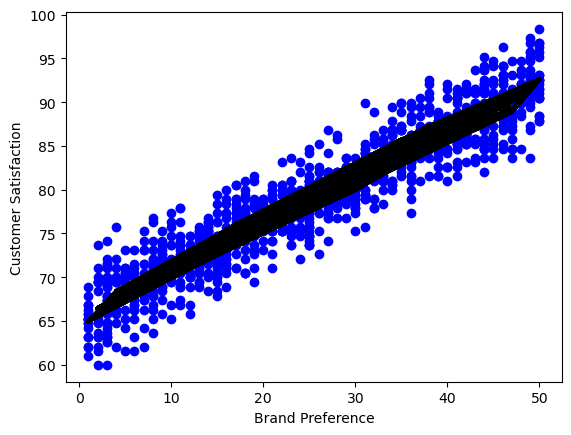

In [133]:
plt.scatter(X['Brand Preference'], Y, color='b')
plt.plot(X['Brand Preference'], mdl.predict(X),color='black',linewidth=3)
plt.xlabel('Brand Preference')  
plt.ylabel('Customer Satisfaction') 
plt.show()

In [134]:
x=df.iloc[:,:4]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x)
print(y)

     Brand Preference  Brand Attitude  Purchase Intention  Professionalism
0                  25              20                  46               63
1                  37              19                  42               62
2                  19              20                  43               63
3                  28              18                  40               62
4                  17              13                  48               67
..                ...             ...                 ...              ...
995                30              14                  45               61
996                29              15                  49               63
997                39              20                  43               63
998                 7              17                  49               66
999                17              11                  45               68

[1000 rows x 4 columns]
0      81.004
1      84.160
2      76.270
3      77.848
4      76.270
     

In [143]:
#from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
score=regressor.score(x_train,y_train)
y_predL=regressor.predict(x_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse=mean_squared_error(y_test,y_predL)
r2=r2_score(y_test,y_predL)
MAE=mean_absolute_error(y_test,y_predL)
print("MAE",MAE)
print("Mean Square Error of Linear Regression",mse)
print("R2 score of Linear Regression",r2)

MAE 1.6271428648906295e-14
Mean Square Error of Linear Regression 3.4230252399350146e-28
R2 score of Linear Regression 1.0


In [151]:
#from sklearn.svm import DecisionTreeRegressor
mdl =  DecisionTreeRegressor()
mdl.fit(x_train,y_train)

# Make predictions on the test set
y_preds=mdl.predict(x_test)

# Evaluate the model
mse=mean_squared_error(y_test,y_preds)
r2=r2_score(y_test,y_preds)
mae=mean_absolute_error(y_test,y_preds)
print("Mean Square Error of DecisionTree Regression",mse)
print("R2 score of DecisionTree Regression",r2)
print("Mean absolute Error of DecisionTree Regression",mae)

Mean Square Error of DecisionTree Regression 3.0572698000000016
R2 score of DecisionTree Regression 0.9547137829113996
Mean absolute Error of DecisionTree Regression 1.3360400000000008
